In [ ]:
#### Importing and preperation of data
### Import library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

ImportError: ignored

In [ ]:
#### import and load dataset
dataset = pd.read_csv('waterQuality1.csv')


**Summarize the dataset**




In [ ]:
# We can get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.

dataset.shape


(7999, 21)

**WE CAN SEE THAT OUR DATA HAS 7999 ROWS AND 21 COLUMNS**

In [ ]:
##### Lets read the six first rows
dataset.head(6)

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
5,0.94,14.47,0.03,2.88,0.003,0.80,0.43,1.38,0.11,0.67,...,0.135,9.75,1.89,0.006,27.17,5.42,0.08,0.19,0.02,1


In [ ]:
###Now lets get infos about our data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

There are 7999 instances in the dataset.We can notice that, there is missing data.
All attributes are numerical, except the is_safe and amonia. Normally those 2 attributes should be text, but when we look thre first 6 rows, their values are repetitives, that means they are probably categorical attibute.
let use value count to learn more.

In [ ]:
dataset["ammonia"].value_counts()

0.17     13
0.12     13
0.37     13
13.74    12
0.75     11
         ..
22.37     1
6.78      1
16.4      1
24.46     1
10        1
Name: ammonia, Length: 2564, dtype: int64

In [ ]:
dataset[dataset["ammonia"] == "#NUM!"]

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
7551,0.03,#NUM!,0.08,0.79,0.07,0.08,0.05,0.58,0.34,0.00,...,0.183,4.37,1.43,0.007,0.62,2.54,0.07,0.05,0.05,#NUM!
7568,0.06,#NUM!,0.07,1.72,0.08,0.32,0.01,1.11,0.61,0.00,...,0.178,12.10,2.03,0.008,1.37,2.05,0.06,0.10,0.07,#NUM!
7890,0.01,#NUM!,0.08,0.49,0.00,0.07,0.09,0.06,0.72,0.57,...,0.088,9.57,1.45,0.009,7.67,7.70,0.03,0.05,0.02,#NUM!


In [ ]:
dataset[dataset["is_safe"] == "#NUM!"]

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
7551,0.03,#NUM!,0.08,0.79,0.07,0.08,0.05,0.58,0.34,0.00,...,0.183,4.37,1.43,0.007,0.62,2.54,0.07,0.05,0.05,#NUM!
7568,0.06,#NUM!,0.07,1.72,0.08,0.32,0.01,1.11,0.61,0.00,...,0.178,12.10,2.03,0.008,1.37,2.05,0.06,0.10,0.07,#NUM!
7890,0.01,#NUM!,0.08,0.49,0.00,0.07,0.09,0.06,0.72,0.57,...,0.088,9.57,1.45,0.009,7.67,7.70,0.03,0.05,0.02,#NUM!


In [ ]:
dataset.drop([7551,7568,7890], inplace = True)

In [ ]:
###  show the summary of numerical attributes by using describe() method

dataset.describe()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.666396,0.161477,1.567928,0.042803,2.177589,0.247300,0.805940,0.771646,0.319714,0.328706,0.099431,9.819250,1.329846,0.005193,16.465266,2.920106,0.049684,0.147811,0.044672
std,1.265323,0.252632,1.216227,0.036049,2.567210,0.270663,0.653595,0.435423,0.329497,0.378113,0.058169,5.541977,0.573271,0.002967,17.688827,2.322805,0.028773,0.143569,0.026906
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.407500,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.745000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000
max,5.050000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


count, mean, min,max rows are self explanatory. The std row show the standard deviation, which measures how dispersed the value are. the 25, 75,50  percent row show the corresponding percentiles in a group of observation.
For example 25 percent water have an aluminuim lower than 0.07

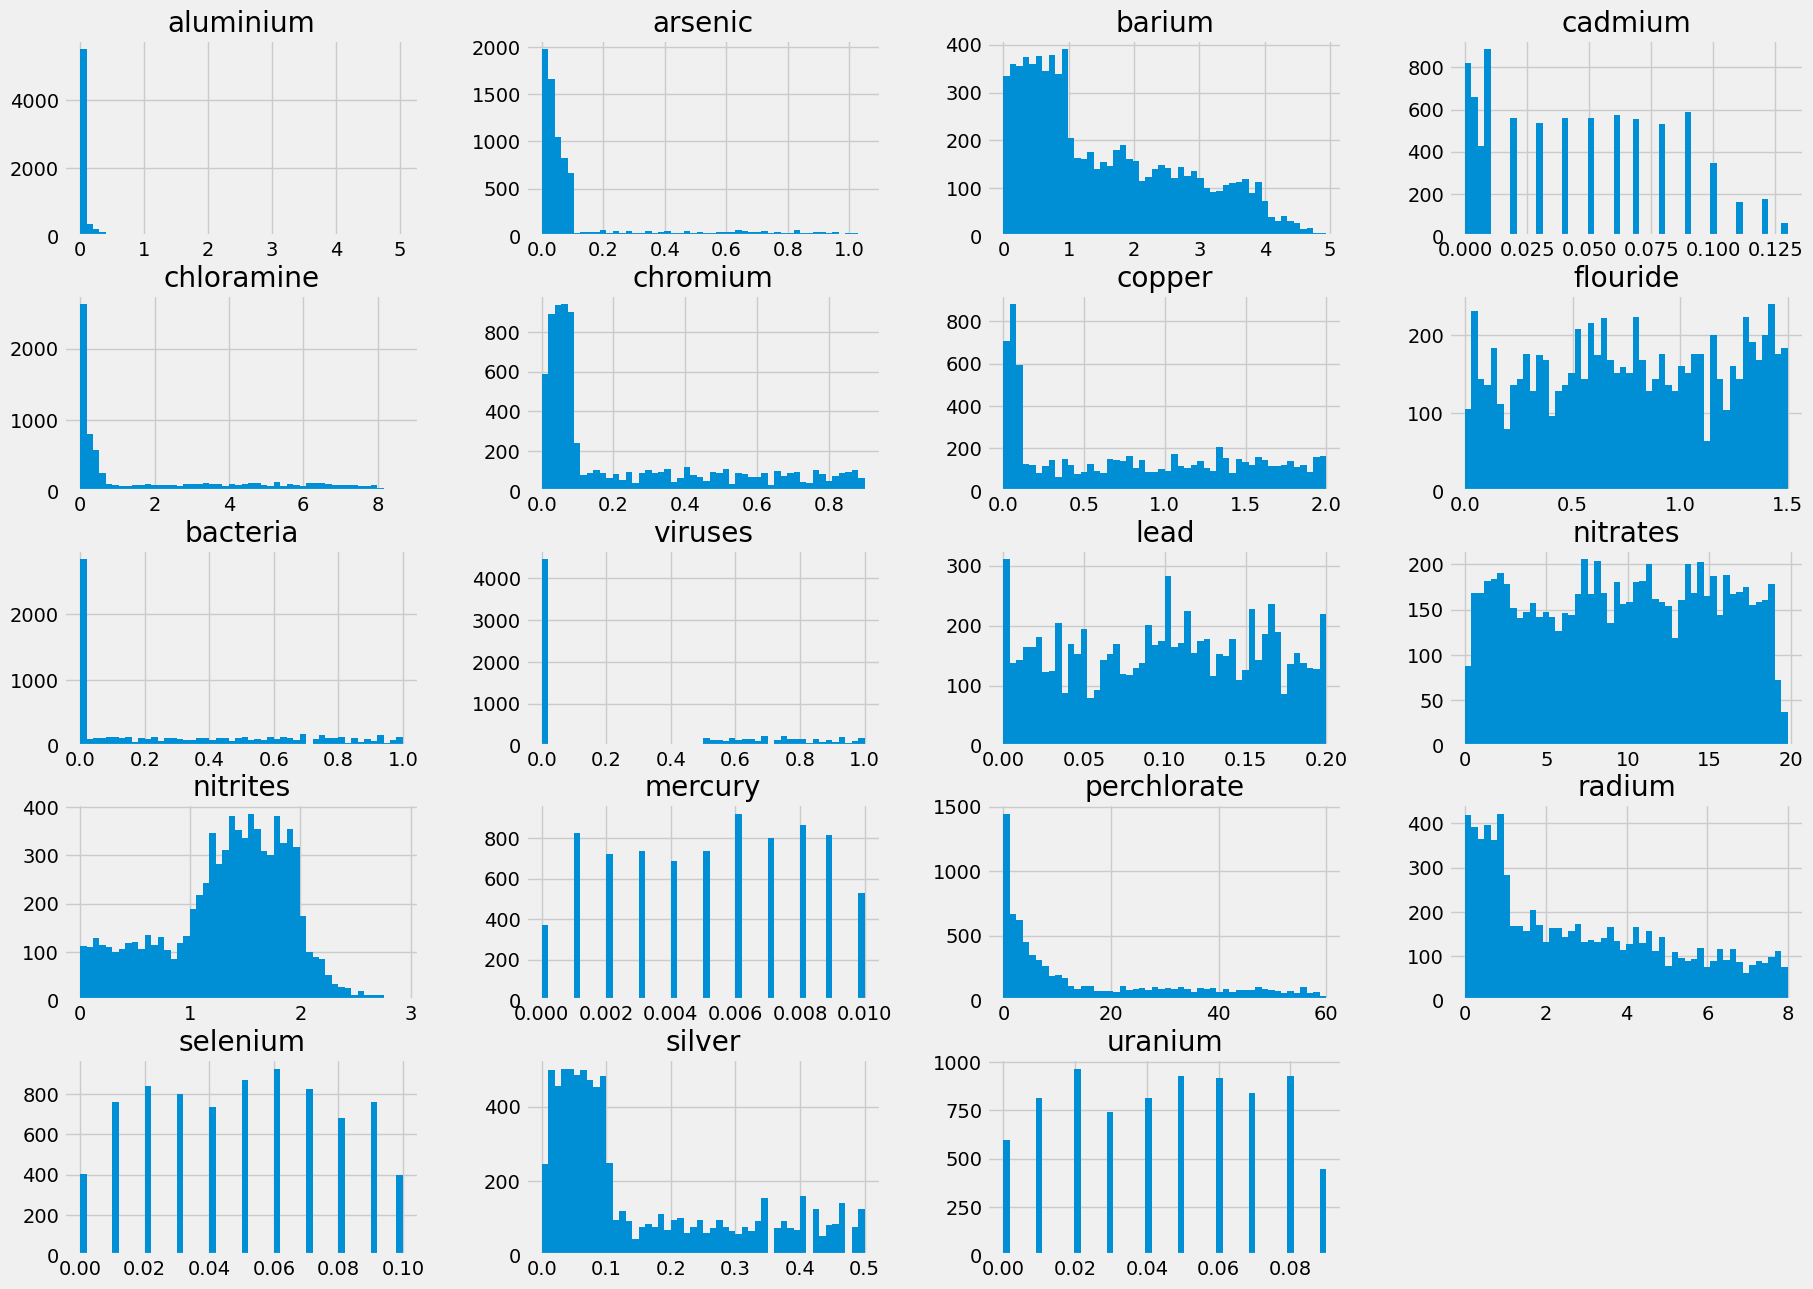

In [ ]:
###lets use the histogram to check again the type of data were are dealing with

dataset.hist(bins= 50,figsize=(20,15))
plt.show()

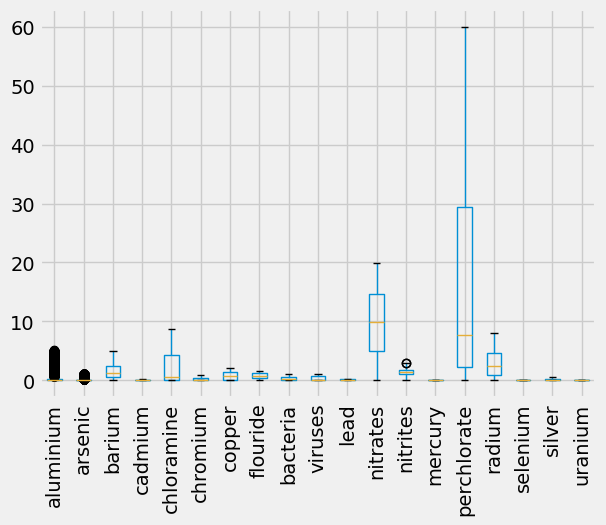

In [ ]:
# outliers

dataset.boxplot()
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Let’s now take a look at the number of instances (rows) that belong to each class.
dataset.groupby('is_safe').size()

is_safe
0    7084
1     912
dtype: int64

**#### 2.4 Dividing data into features and labels**

since all our features are numerical, there is not need to use labencoder transform our data

In [ ]:
X=dataset.drop("is_safe",axis=1)
y=dataset['is_safe']


   **Spliting dataset into training set and test set**
   To avoid over-fitting, we will divide our dataset into training and test splits, which gives us a better idea as to how our algorithm performed during the testing phase. This way our algorithm is tested on un-seen data, as it would be in a production application.  This command splits the dataset into 80% train data and 20% test data. This means that out of total 150 records, the training set will contain 120 records and the test set contains 30 of those records.

In [ ]:
# already imported:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [ ]:
X_train.shape

(6396, 20)

In [ ]:
y_train.shape

(6396,)

#### 2.7 Feature Scaling
 feature scaling is generally needed so we'll do that here.
Before making any actual predictions, it is (almost) always a good practice to scale the features so that all of them can be uniformly evaluated.

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# What does our (X_train) dataset look like after Feature Scaling
print(X_train)

[[-0.48488972 -0.47298608 -0.47767791 ...  1.39666608 -0.61134055
  -0.54422751]
 [-0.50047622  1.09387439 -0.43767922 ...  1.74478486 -0.96099039
   0.93715525]
 [-0.51606272  1.04656444 -0.47767791 ...  1.04854729 -0.68127052
   1.67784663]
 ...
 [ 2.25833396  1.17948287  3.16220287 ...  1.74478486  1.48655849
  -0.17388182]
 [-0.49268297 -1.14095751 -0.55767529 ...  1.39666608 -0.61134055
   0.93715525]
 [-0.46150997  1.14794291 -0.5176766  ...  1.04854729  0.71732884
   1.67784663]]


   DATA VIZUALISATION

               Parallel Cordinate

      Parallel coordinates is a plotting technique for plotting multivariate data. It allows one to see clusters in data and to estimate other statistics visually.
      Using parallel coordinates points are represented as connected line segments. Each vertical line represents one attribute. One set of connected line segments represents one data point. Points that tend to cluster will appear closer together.

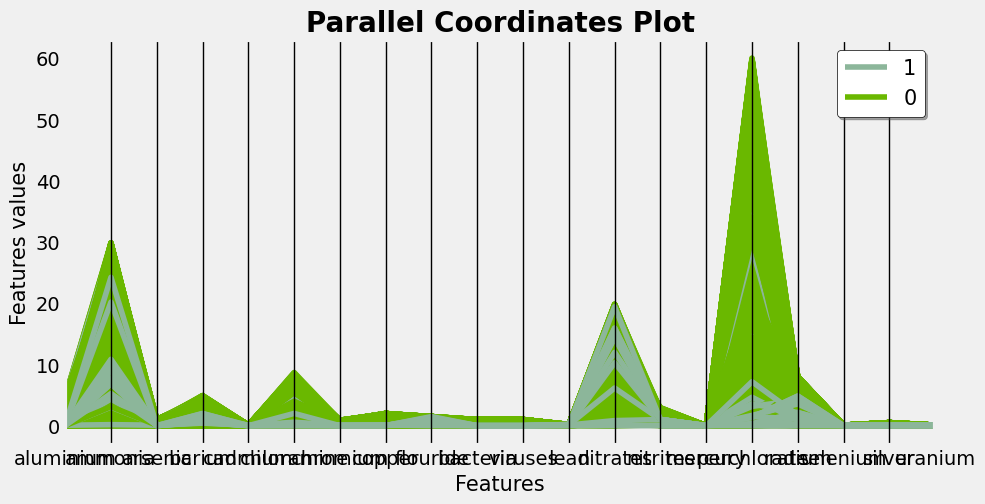

In [ ]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(10,5))
parallel_coordinates(dataset, "is_safe")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

<Figure size 640x480 with 0 Axes>

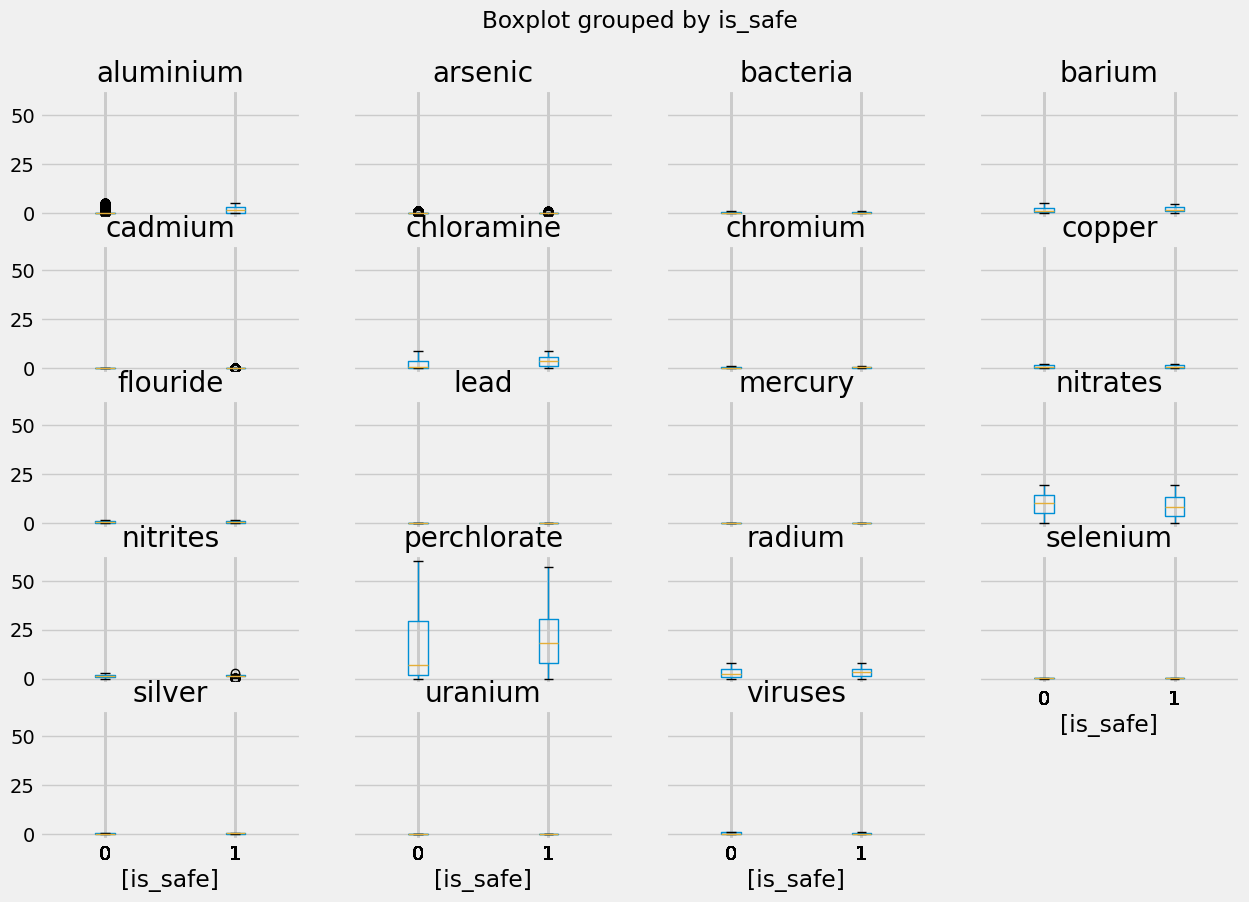

In [ ]:
plt.figure()
dataset.boxplot(by = "is_safe",  figsize=(15, 10))
plt.show()

<ipython-input-23-06c905a82735>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr().abs(), annot=True, cmap='RdYlGn')


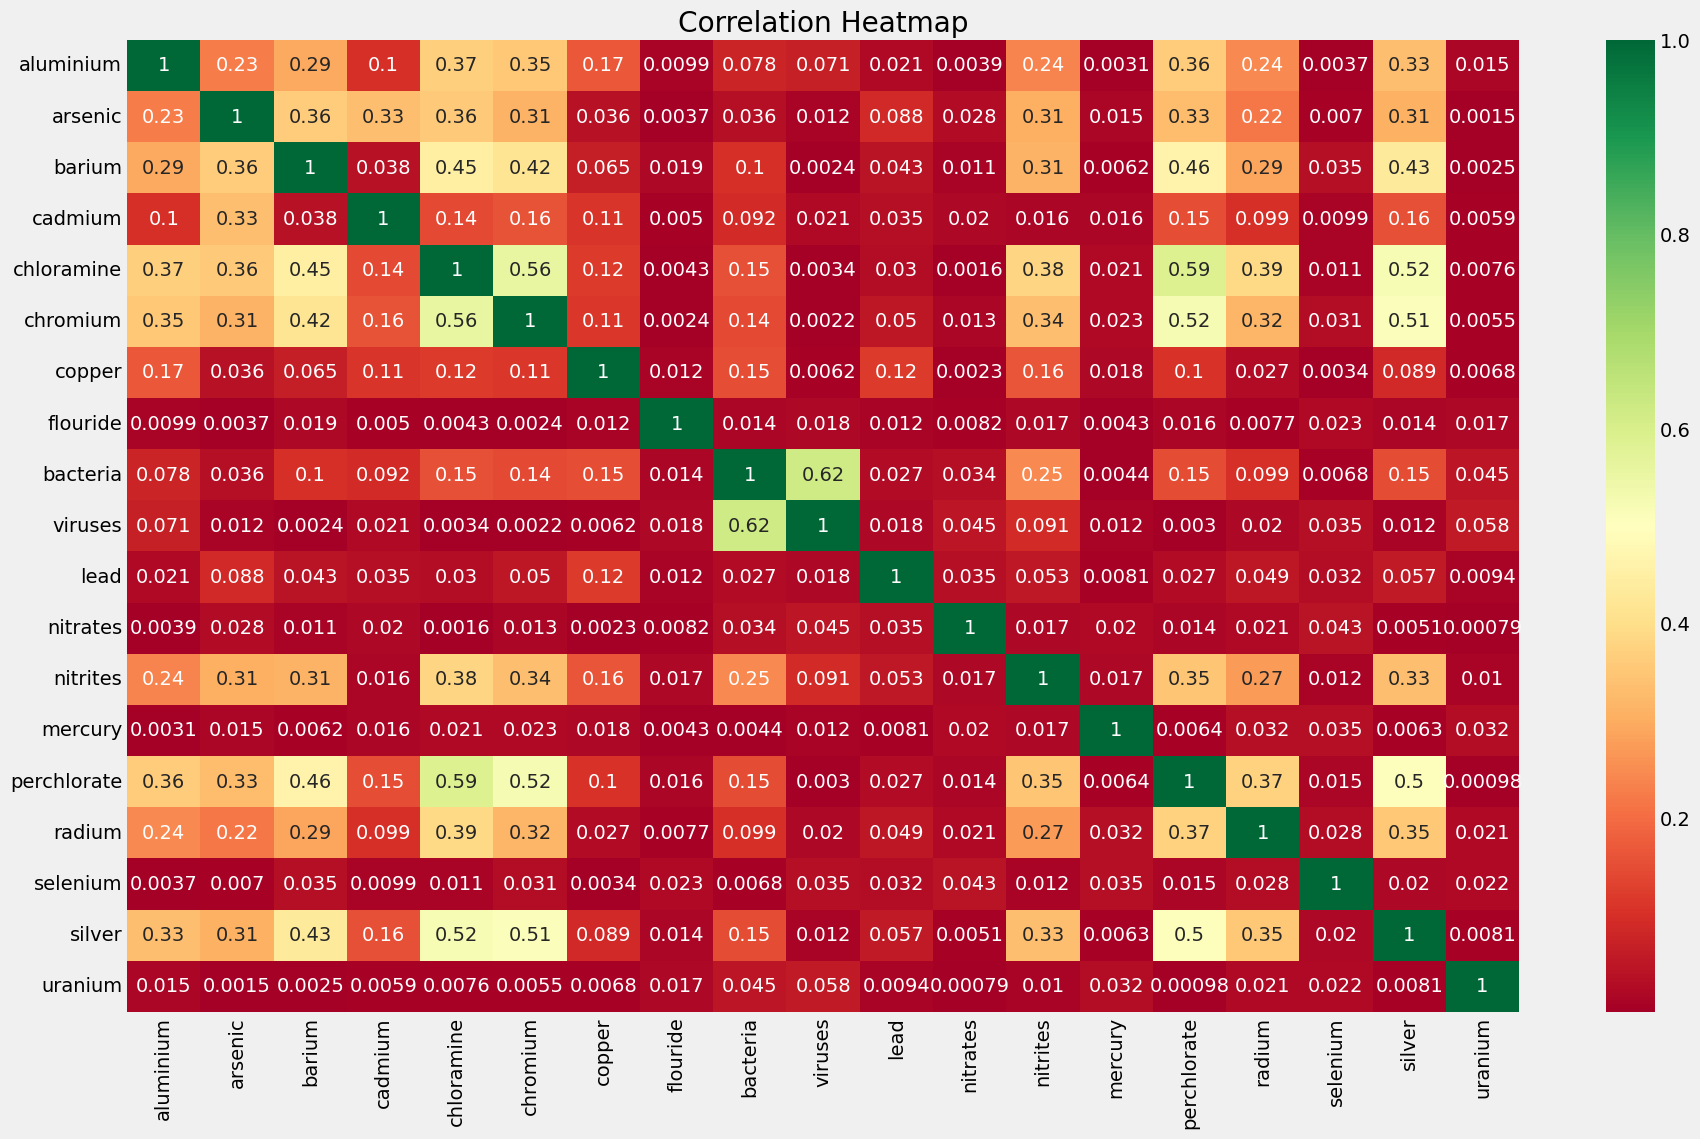

In [ ]:
#### correlation map

plt.figure(figsize=(20,12))
#draws heatmap with input as the correlation matrix calculted by(data.corr())
sns.heatmap(dataset.corr().abs(), annot=True, cmap='RdYlGn')
plt.title('Correlation Heatmap')
plt.show()

                           USING MACHINE LEARNING TO MAKE PREDICTION

In [ ]:

#### lets start with logistic regression

log_reg=LogisticRegression()

In [ ]:

# Fitting the model
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Predicting the Test set results
y_pred = log_reg.predict(X_test)

[[1394   24]
 [ 122   60]]


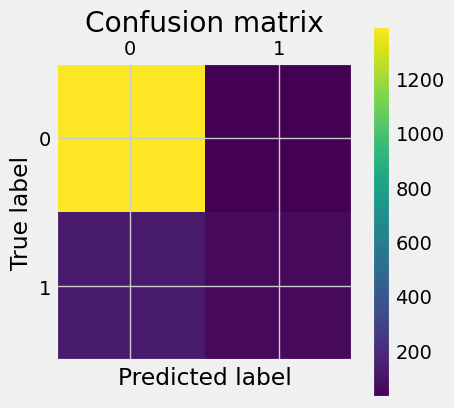

In [ ]:
#####  Evaluating predictions
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

The confusion matrix indicates that there were four true negative predictions, three true positive predictions, two false negative predictions, and one false positive prediction.

In [ ]:
##### Let's evaluate our classifier's accuracy
scores = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Accuracies: %s' % scores)
print('Mean accuracy: %s' % np.mean(scores))


Accuracies: [0.9046875  0.90695856 0.90461298 0.90852228 0.90304926]
Mean accuracy: 0.9055661161063331


 accuracy measures the overall correctness of the classifier. We can see that our accuracy here 90 percent.

A **Classification Report** is often used in tandem with the confusion matrix.  

*   **Recall** refers to the model's ability to correctly identify the result.   
*   **Precision** reflects successful identification within those identified.  
*   **F1-score** is a weighted average of Recall and Precision.
*   **Accuracy** represents overall accuracy of the model.

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1418
           1       0.71      0.33      0.45       182

    accuracy                           0.91      1600
   macro avg       0.82      0.66      0.70      1600
weighted avg       0.90      0.91      0.89      1600



Now lets work with Decision trees


In [ ]:
#####lets use DecisionTreeClassifier to make prediction


dtf = DecisionTreeClassifier(random_state=11)
dtf.fit(X_train, y_train)
predictions = dtf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1418
           1       0.83      0.80      0.81       182

    accuracy                           0.96      1600
   macro avg       0.90      0.89      0.89      1600
weighted avg       0.96      0.96      0.96      1600



In [ ]:
##### Let's evaluate our classifier's accuracy
scores = cross_val_score(dtf, X_train, y_train, cv=5)
print('Accuracies: %s' % scores)
print('Mean accuracy: %s' % np.mean(scores))

Accuracies: [0.95078125 0.95777952 0.94448788 0.94370602 0.94526974]
Mean accuracy: 0.9484048817435496


[[1394   24]
 [ 122   60]]


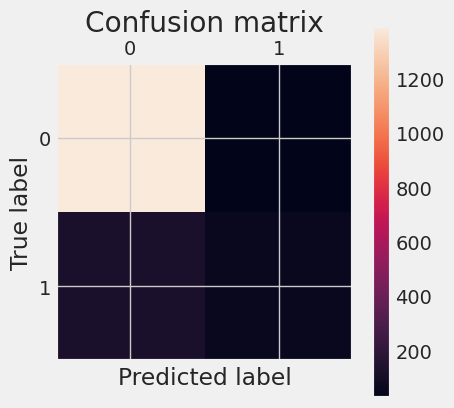

In [ ]:
#####  Evaluating predictions
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

            Let's train a random forest with scikit-learn        **    

In [ ]:
####Let's train a random forest with scikit-learn

rdn = RandomForestClassifier(n_estimators=1000, random_state=11)
rdn.fit(X_train, y_train)
predictions = rdn.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1418
           1       0.93      0.69      0.79       182

    accuracy                           0.96      1600
   macro avg       0.95      0.84      0.89      1600
weighted avg       0.96      0.96      0.96      1600



In [ ]:
##### Let's evaluate our classifier's accuracy
scores = cross_val_score(clf, X_train, y_train, cv=5)
print('Accuracies: %s' % scores)
print('Mean accuracy: %s' % np.mean(scores))

Accuracies: [0.9484375  0.95777952 0.95074277 0.95074277 0.94917905]
Mean accuracy: 0.9513763193901486


 we use  make_classificaton to create an artificial classification dataset. This convenience function allows fine-grained control over the characteristics of the dataset it produces.We then train and evaluate a random forest with 1000 estimators. The random forest's F1 precision, recall, and F1 scores are greater.